# Домашнее задание: Кластеризация

Задание выполнил(а): Парфенюк Анна

### Общая информация

__Дата выдачи:__ 09.08.2021

__Дедлайн:__ 23.08.2021

### О задании

Часть 1 содержит практическое задание на реализацию метода KMeans.

Часть 2 содержит практическое задание на применение методов KMeans и Иерархических методов кластеризации.


### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках). Максимально допустимая оценка за работу — 10 баллов. Обратите внимание, что только за реализацию функций без подтверждения их корректной работы оценка выставляться не будет.

Задание выполняется САМОСТОЯТЕЛЬНО. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 4 баллов.

При сдаче после указанного срока сдачи от выставленной оценки за работу будет отниматься 0.5 балла за каждые 24 часа просрочки.

### Формат сдачи

Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: Username_clustering.ipynb, где Username — ваша фамилия на латинице (например, Ivanov_clustering.ipynb). Далее отправьте этот файл на почту NHryshchuk@ibagroup.eu с темой письма "hw_clustering.%FULL_NAME%" с указанными выше условиями.

# Часть 1. K-means своими руками (5 баллов)

В этом задании вам нужно будет реализовать алгоритм K-Means. Для этого потребуется:

- следовать инструкциям
- воспользоваться базовыми техниками `numpy`
- понимание, что происходит в алгоритме K-Means

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)

Сгенерируем случайную выборку. Матрица объекты-признаки находится в переменной $X$.

In [ ]:
np.random.seed(13)
X1 = np.random.randn(100,2)
X2 = np.random.randn(100,2) - np.array([10,1])
X3 = np.random.randn(100,2) - np.array([1,10])
X = np.vstack((X1,X2,X3))

Визуализируем выборку:

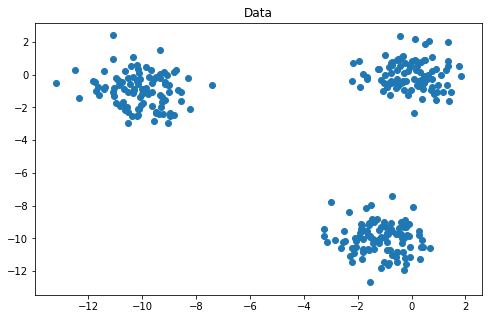

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.title('Data')
plt.show()

## Задание 1 (2 балла)

Чтобы реализовать алгоритм K-Means, нам понадобится вспомогательная функция. В процессе работы алгоритма мы все время обновляем значение целевой переменной для каждого объекта - то есть на каждом шаге вычисляем, к какому кластеру он относится. На каждом шаге нам известно, где находятся центры кластеров, так что задача - для каждого объекта посчитать расстояние до центров кластеров и выбрать ближайший из них в качестве ответа.

На практике это удобно сделать с помощью функции [`sklearn.metrics.pairwise_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html). Она может принимать на вход два массива $X$ и $Y$, а на выходе предоставить матрицу расстояний, где в $i$-ой строке и $j$-ом столбце стоит расстояние между $i$-ым объектом в $X$ и $j$-ым объектом в $Y$.

Не воспрещается и реализовать это как-то по-другому.

Также в процессе вам возможно понадобится функция `np.argmin` (не забудьте про параметр `axis`!).

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
def compute_clusters(X, centers):
    """
    INPUT:
    X - np.array, (n_objects x n_features) - матрица объекты-признаки
    centers - np.array, (n_clusters x n_features) - матрица, содержащая координаты центров кластеров
    
    OUTPUT:
    y - np.array, (n_objects,) - вектор, состоящий из меток кластеров (0, 1, ..., n_clusters-1), где
    на i-ом месте стоит метка кластера для i-ого объекта выборки X
    """
    dists = pairwise_distances(X, centers)
    y = np.apply_along_axis(arr=dists, axis=1, func1d=np.argmin)
    return y

centers = (np.arange(6)*0.05).reshape(3, 2)
assert np.allclose(
    compute_clusters(X, centers), 
    np.array([0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
)

## Задание 2 (3 балла)

Реализуйте класс KMeans, обладающий методами `fit` (находит оптимальные центры кластеров) и `transform` (вычисляет, к какому кластеру относятся каждый объект выборки).

Метод `fit`:

1. Посчитайте, сколько объектов и признаков есть в выборке. **(0.33 балла)**
2. Инициализируйте $y$ - вектор длины `n_objects` (число объектов в выборке $X$), хранящий изначальные метки кластеров для объектов (можно воспользоваться функциями `np.empty`, `np.random.randint` или какими-то другими). **(0.33 балла)**
3. Создайте матрицу для хранения центров кластеров (размера `n_clusters x n_features`) - можно заполнить ее нулями. **(0.33 балла)**
4. На каждой итерации обновите центры кластеров. То есть для каждого кластера посчитайте центр тяжести по формуле ниже и переместите центр кластера туда:
$$
c_j = \frac{\sum\limits_{x \in C^j}x}{|C^j| + \varepsilon},
$$
где $c_j$ - центр тяжести, $C^j$ - кластер, $x$ - объект из кластера $C^j$ (вектор - в сумме мы просто складываем их координаты), $|C^j|$ - число объектов в кластере $C^j$, $\varepsilon$ - какое-то очень маленькое число (например, $10^{-6}$) для стабильности - чтобы мы не поделили на $0$, если в кластере $C^j$ нет объектов. Возможно, в этом задании вам понадобятся функции `sum`, `mean` - не забывайте про параметр `axis`! **(1 балл)**
5. После перемещения центров кластеров в центры тяжести обновите $y$ - чтобы отнести объекты к кластерам с пересчитанными центрами. Каждый объект будет относиться к тому кластеру, расстояние от центра которого до объекта наименьшее. (Вот тут вам понадобится функция `compute_clusters`). **(0.5 балл)**

Метод `transform`:

1. Для выборки $X$ посчитайте, к какому из найденных кластеров (с центрами в `self.centers`) относится каждый объект. Здесь вам тоже понадобится функция `compute_clusters`). **(0.5 балла)**.

In [ ]:
class KMeans:
    def __init__(self, n_clusters):
        # гиперпараметр - количество кластеров
        self.n_clusters = n_clusters
        
    def fit(self, X, max_iter=10, visualize=False):
        """
        INPUT:
        X - np.array, (n_objects x n_features) - матрица объекты-признаки
        max_iter - int - максимальное число итераций
        visualize - bool - визуализировать ли объекты и центры кластеров на каждой итерации 
        """
        # Цель: обучить центры кластеров self.centers, форма: число кластеров x число признаков
        
        # Шаг 1: сколько объектов и признаков?
        num_obj = X.shape[0]
        num_feat = X.shape[1]
        
        # Шаг 2: инициализируйте y - вектор длины n_objects, 
        # хранящий, к какому кластеру относится каждый объект
        # каждый элемент - случайно выбранный номер кластера 
        y = np.random.randint(self.n_clusters, size=num_obj)
        
        # Шаг 3: создайте матрицу для хранения центров кластеров
        self.centers = np.zeros([self.n_clusters, num_feat])
        
        for n_iter in range(max_iter):
            # Шаг 4: обновите центры кластеров
            for cl in range(self.n_clusters):
                cl_feat = X[y == cl]
                self.centers[cl] = np.sum(cl_feat, axis=0) / (len(cl_feat) + 10e-6)
            
            # Шаг 5: обновите y. Для этого вычислите расстояния между всеми объектами 
            # и центрами кластеров (используйте pairwise_distances), 
            # затем найдите ближайший к каждому объекту кластер
            
            y = compute_clusters(X, self.centers)
            
            # Поддержка флага visualize
            if visualize:
                plt.figure(figsize=(5,5))
                plt.scatter(X[:, 0], X[:, 1], c=y)
                plt.scatter(self.centers[:, 0], self.centers[:, 1], c='red', marker='x')
                plt.title('Step {}'.format(n_iter + 1))
                plt.show()
    
    def transform(self, X):
        """
        INPUT:
        X - np.array, (n_objects x n_features) - матрица объекты-признаки
        
        OUTPUT:
        y_pred - np.array, (n_objects,) - вектор, состоящий из меток кластеров (0, 1, ..., self.n_clusters-1), где
    на i-ом месте стоит метка кластера для i-ого объекта выборки X
        """        
        y_pred = compute_clusters(X, self.centers)
        return y_pred

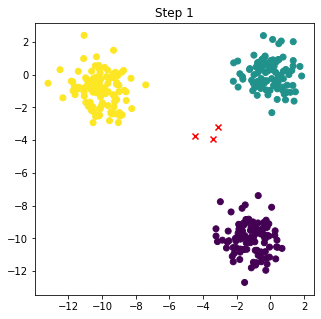

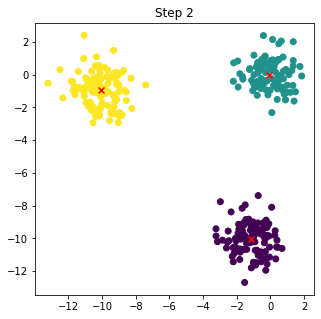

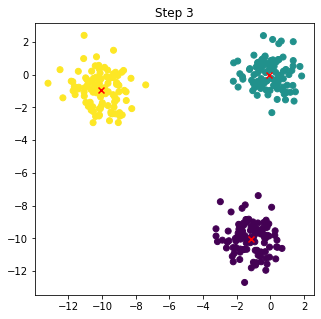

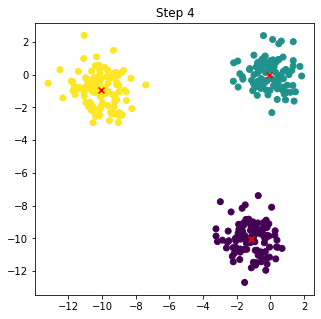

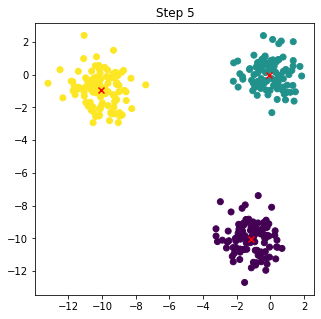

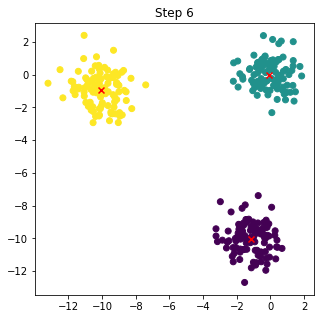

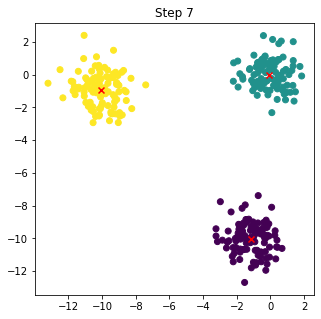

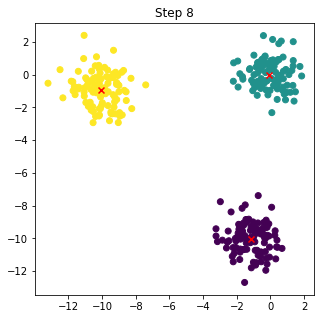

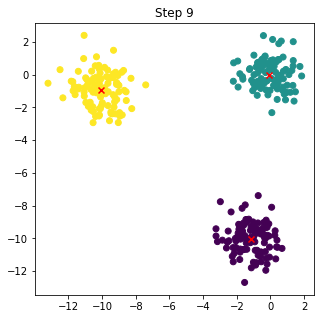

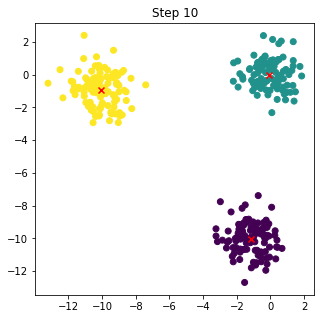

In [ ]:
km = KMeans(3)
km.fit(X, visualize=True)
y = km.transform(X)

Итоговая кластеризация:

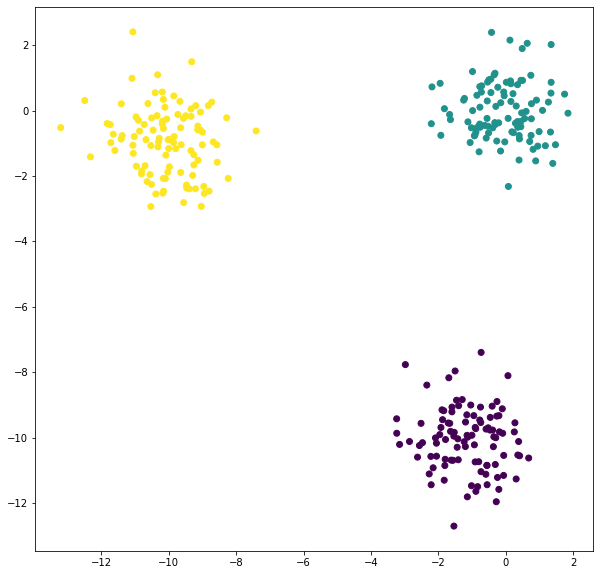

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Часть 2. Clustering of countries (5 баллов)

### Основная цель: нужно выделить страны, которые остро нуждаются в помощи.

#### Данные включают:
    country : Название страны
    child_mort : Смерть детей в возрасте до 5 лет на 1000 рожденных
    exports : Экспорт товаров и услуг на душу населения. В процентах от ВВП на душу населения
    health : Общие расходы на здравоохранение на душу населения. В процентах от ВВП на душу населения 
    imports : Импорт товаров и услуг на душу населения. В процентах от ВВП на душу населения
    income : Чистый доход на человека
    inflation : Измерение годового темпа роста общего ВВП
    life_expec : Среднее количество лет, которое прожил бы новорожденный ребенок, если нынешняя структура смертности останется прежней
    total_fer : Количество детей, которые родятся у каждой женщины, если текущие возрастные коэффициенты рождаемости останутся прежними
    gdpp : ВВП на душу населения. Рассчитывается как отношение общего ВВП к общей численности населения

# Задание 1 (1 балл)

Импорт и очистка данных: проверьте данные на наличие нулевых значений, с помощью визуализации данных проверьте на наличие выбросов, корреляции между признаками. Для удаления выбросов воспользуйтесь функцией outlier_treatment.   

In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import fcluster

In [3]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Разделим датасет на признаки и названия стран

In [4]:
df_countries = df['country']
df_f = df.drop(columns=['country'])

Проверим данные на наличие пропусков:

In [5]:
df_f.isnull().sum().sum()


0

Посмотрим, есть ли выбросы в данных:

In [6]:
import seaborn as sns

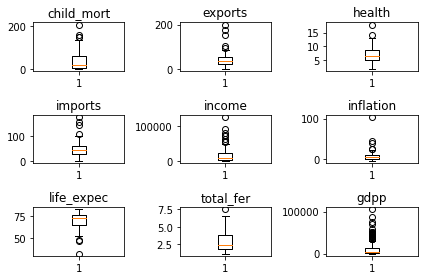

In [7]:
cols = ['child_mort', 'exports', 'health', 'imports',
        'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
        
fig, axs = plt.subplots(3, 3)
for i, col in enumerate(cols):
    axs[i // 3][i % 3].boxplot(df[col])
    axs[i // 3][i % 3].set_title(col)

fig.tight_layout()

Корреляция между признаками:

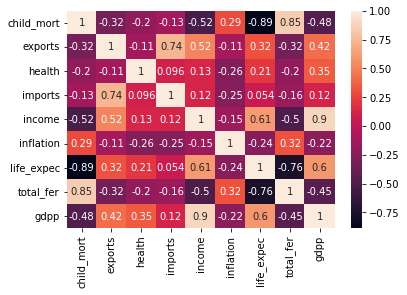

In [8]:
sns.heatmap(df_f.corr(), annot=True)

Удалим выбросы в числовых признаках:

In [9]:
def outlier_treatment(df, col):
    
    Q1 = df[col].quantile(0.25)

    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_cap  = Q1-1.5*IQR

    higher_cap = Q3+1.5*IQR

    df.loc[(df[col] > higher_cap), col] = higher_cap
    df.loc[(df[col] < lower_cap), col] = lower_cap
    
    return df

In [10]:
for col in df_f.columns:
    df_f = outlier_treatment(df_f, col)

# Задание 2 (1 балл)

Нормализуйте все некатегориальные переменные. Выберете наиболее подходящий метод нормализации или стандартизации данных.(sklearn.preprocessing)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
df_scaled = StandardScaler().fit_transform(df_f)

# Задание 3 (1 балл)

Попробуйте K-mean кластеризацию. Методом локтя с помощью метрики силуэт определить оптимальное количество кластеров. Для лучшей интерпретируемости результатов получившуюся кластерную метку добавьте к первоначальным немасштабируемым данным. 

Elbow method:

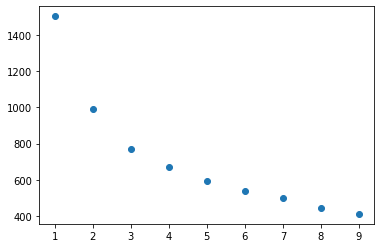

In [13]:
ks = range(1, 10)
scores = []

for k in ks:
    kmeans = KMeans(k, random_state=0).fit(df_scaled)
    scores.append(-kmeans.score(df_scaled))
plt.scatter(ks, scores)

Метод локтя показывает, что оптимальное число кластеров - 2 или 3.

The silhouette coefficient method:

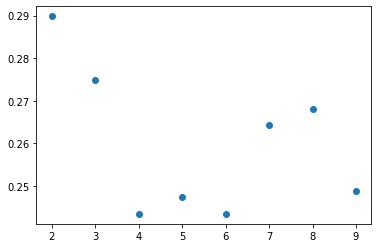

In [14]:
ks = range(2, 10)
scores = []

for k in ks:
    kmeans = KMeans(k, random_state=0).fit(df_scaled)
    scores.append(silhouette_score(df_scaled, np.array(kmeans.labels_).T))
    
plt.scatter(ks, scores)

Наибольшее значение силуэтта достигается при k = 2, затем k = 3.

Попробуем разбить данные на 2 кластера.

In [17]:
df['label'] = KMeans(2, random_state=0).fit_predict(df_scaled)

# Задание 4 (1 балл)

Попробуйте иерархическую кластеризацию с тем же количеством кластеров, определенных в K-mean при этом подберите оптимальный метод расчета расстояний между кластерами.

Best method: ward


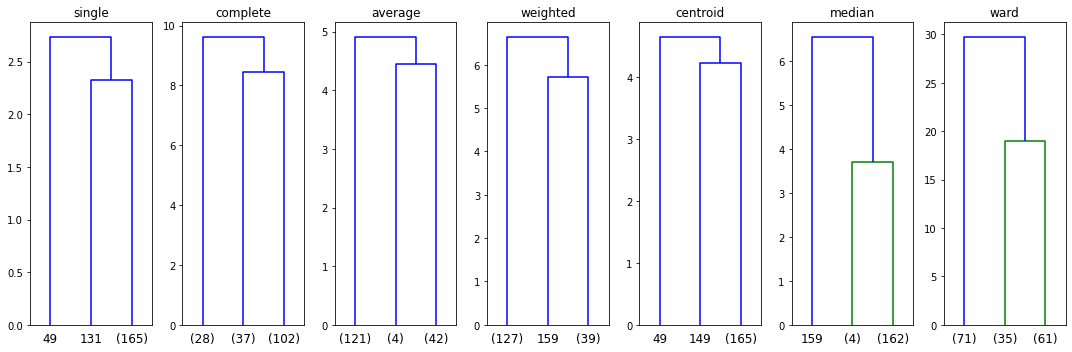

In [18]:
methods = ['single', 'complete', 'average', 'weighted', 
           'centroid', 'median', 'ward']

fig, axs = plt.subplots(1, 7, figsize=(15, 5))
last_dists = []

for i, method in enumerate(methods):
    linked = linkage(df_scaled, method)
    dendrogram(linked, truncate_mode='lastp', p=3, ax=axs[i])
    axs[i].set_title(method)
    last_dists.append(linked[-1][2])

plt.tight_layout()
print('Best method:', methods[np.array(last_dists).argmax()])

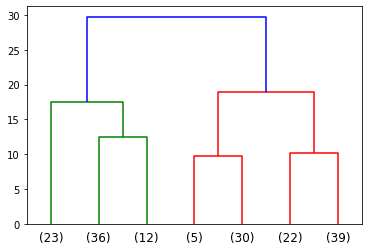

In [20]:
optimal_method = 'ward'
linked = linkage(df_scaled, optimal_method)
dendrogram(linked, truncate_mode='lastp', p=7)
plt.show()

In [21]:
df['labels2'] = fcluster(linked, 2, criterion='maxclust')

# Задание 5 (1 балл)

Сравните полученные результаты методом K-mean и иерархической кластеризацией, используя метрику силуэт. Интерпретируйте полученные этими двумя методами результаты. Не забывайте основная цель было найти страны, которые остро нуждаются в помощи (удалось вам получить кластер с таким списком стран?, если да, то по каким признакам кластер выделился и выведите топ 10 стран, которые нуждаются в помощи). 

In [22]:
print('Kmeans:', silhouette_score(df_scaled, df['label'])) 
print('Hierarchical:', silhouette_score(df_scaled, df['labels2']))

Kmeans: 0.2898395153574449
Hierarchical: 0.24574950716044353


Будем использовать для кластеризации KMeans. Посмотрим на средние показатели выделенных групп стран.

In [23]:
df.groupby('label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels2
label,,,,,,,,,,
0,75.337681,30.044913,6.044493,43.398057,4290.188406,11.268333,62.091304,4.381739,1993.246377,1.913043
1,12.171429,48.898980,7.358673,49.348980,26195.306122,5.327051,76.515306,1.938469,20688.571429,1.336735


Как видно, у нас выделился кластер (с меткой 0) стран, которые нуждаются в помощи. Выберем топ 10 стран:

In [24]:
# возьмем среднее скалированных показателей
df['means'] = np.apply_along_axis(np.mean, 1, df_scaled)
# выберем топ 10 с минимальным средним показателем
df[df.label == 0].sort_values(by='means').country[:10].values

array(['Myanmar', 'Bangladesh', 'Eritrea', 'Central African Republic',
       'India', 'Kenya', 'Philippines', 'Pakistan', 'Indonesia', 'Egypt'],
      dtype=object)

Из таблицы со средними показателями видно, что наиболее решающими признаками были ВВП, смертность детей, доход на человека и уровень инфляции.
